In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
from sympy import Point, Line
from sklearn.metrics import r2_score, mean_squared_error
import sys
sys.path.insert(1, '../Scripts')
from funciones import SampleIDD, simbologia, grafico_posicion_section,graficar_sections, graficar_versus_core,graficar_versus_core_rock, graficar2, grafico_edades, grafico_posicion, simbologia_core

In [17]:
#-------------------- Load data
Data = pd.read_excel("../Data/TephraDataBase_normalizado.xlsx")
Data = Data.replace('-',np.nan)
Data = Data.replace('not determined',np.nan)
Data = Data.replace('Not analyzed',np.nan)
Data = Data.replace('n.a.',np.nan)
Data = Data.replace('n.d.',np.nan)
Data = Data.replace('Over range',np.nan)
Data = Data.replace('bdl',np.nan)
Data = Data.replace('<1',np.nan)
Data = Data.replace('<4',np.nan)
Data = Data.replace('<6',np.nan)
Data = Data.replace('<5',np.nan)
Data = Data.replace('<10',np.nan)
Data = Data.replace('<0.01',np.nan)
Data = Data.replace('<0.1',np.nan)
Data.Flag = Data.Flag.astype(str)
Data = Data[(Data.Flag.str.contains('Outlier') == False)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


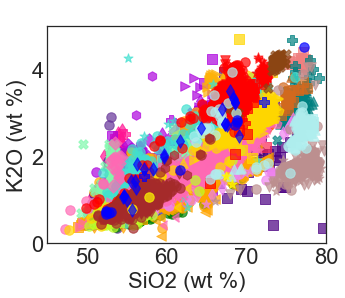

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


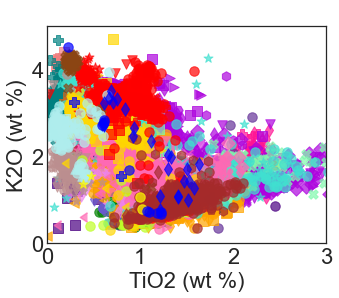

In [18]:
graficar_versus_core('SiO2','K2O',Data[Data.Volcano!='Unknown'] ,Xmin=45,Xmax=80,Ymin=0,Ymax=5)
graficar_versus_core('TiO2','K2O',Data[Data.Volcano!='Unknown'] ,Xmin=0,Xmax=3,Ymin=0,Ymax=5)

### 1.- Calculate and visualize 'effusive' and 'bulk pyroclastic' products linear regressions (SiO2 versus K2O)

C:\Users\consue\AppData\Local\Temp\ipykernel_20620\2272665741.py:92: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('../Plots/'+volcan+'_trend.pdf',dpi = 300,bbox_inches='tight',bbox_to_anchor=(1,1))
C:\Users\consue\AppData\Local\Temp\ipykernel_20620\2272665741.py:92: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('../Plots/'+volcan+'_trend.pdf',dpi = 300,bbox_inches='tight',bbox_to_anchor=(1,1))
C:\Users\consue\AppData\Local\Temp\ipykernel_20620\2272665741.py:92: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('../Plots/'+volcan+'_trend.pdf',dpi = 300,bbox_inches='tight',bbox_to_anchor=(1,1))
C:\Users\consue\App

C:\Users\consue\AppData\Local\Temp\ipykernel_20620\2272665741.py:92: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('../Plots/'+volcan+'_trend.pdf',dpi = 300,bbox_inches='tight',bbox_to_anchor=(1,1))
C:\Users\consue\AppData\Local\Temp\ipykernel_20620\2272665741.py:92: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('../Plots/'+volcan+'_trend.pdf',dpi = 300,bbox_inches='tight',bbox_to_anchor=(1,1))
C:\Users\consue\AppData\Local\Temp\ipykernel_20620\2272665741.py:92: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('../Plots/'+volcan+'_trend.pdf',dpi = 300,bbox_inches='tight',bbox_to_anchor=(1,1))
C:\Users\consue\App

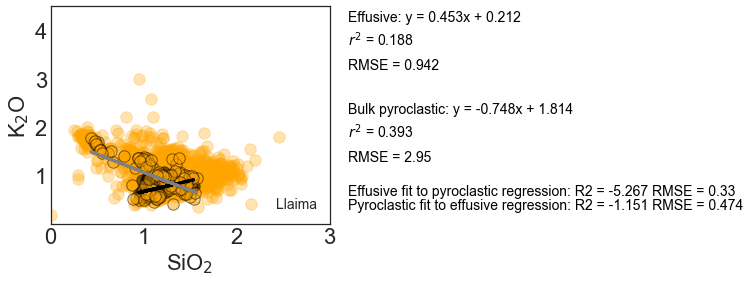

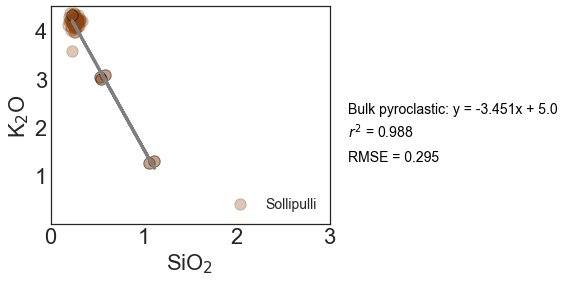

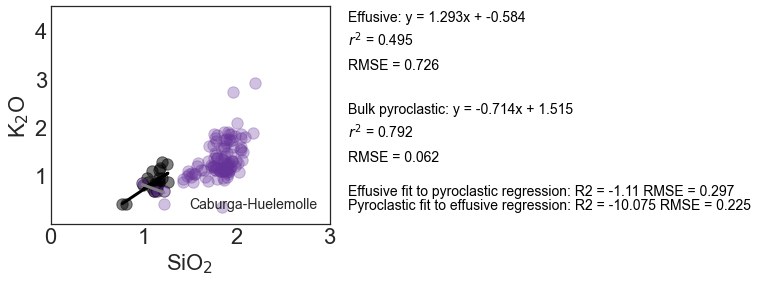

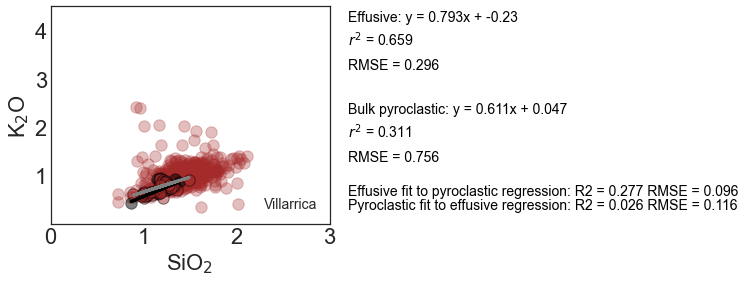

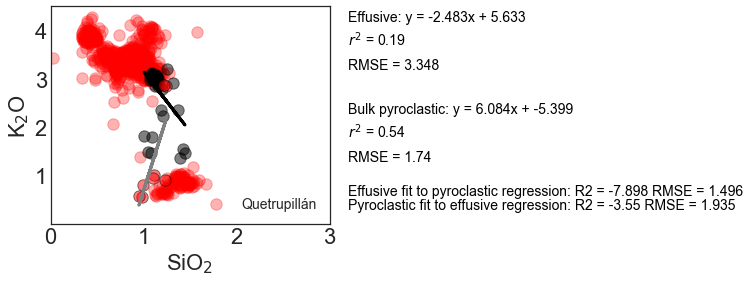

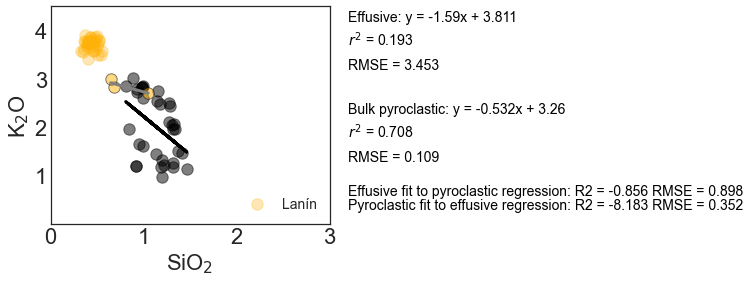

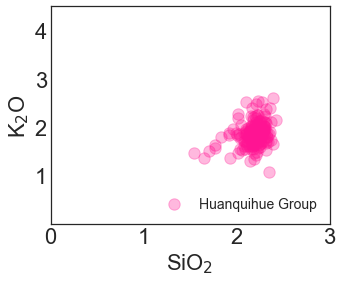

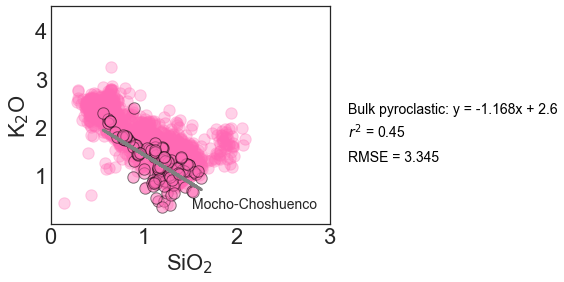

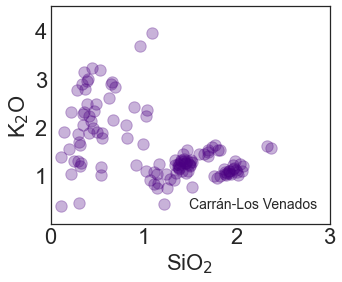

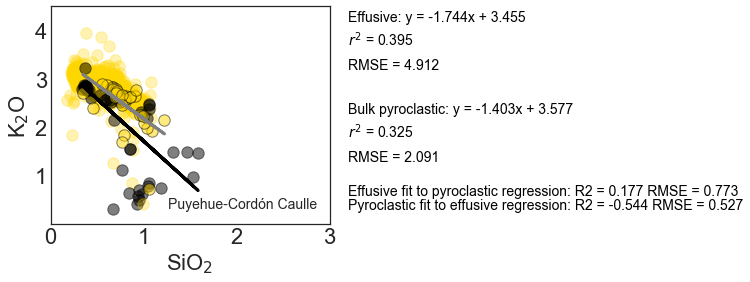

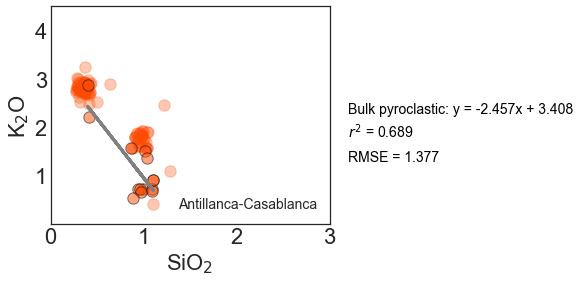

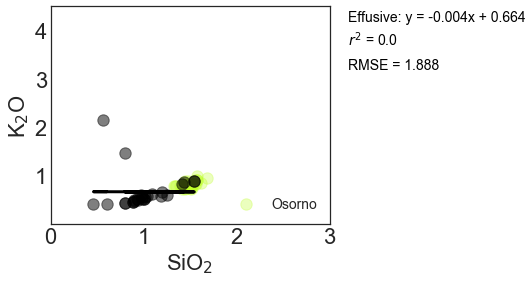

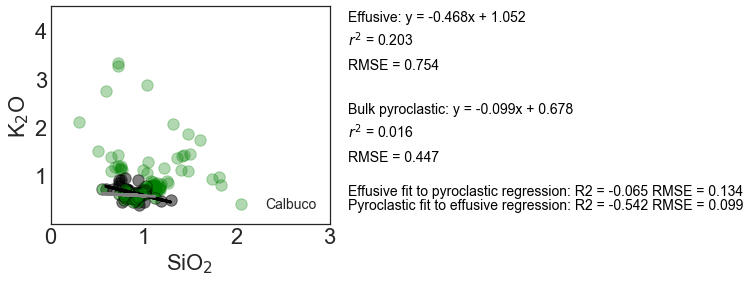

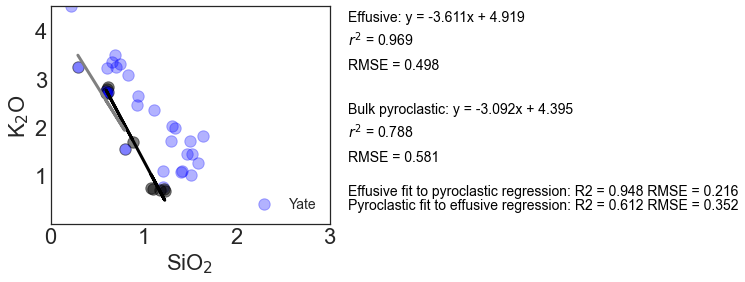

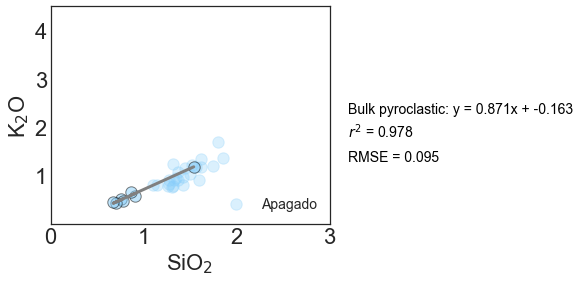

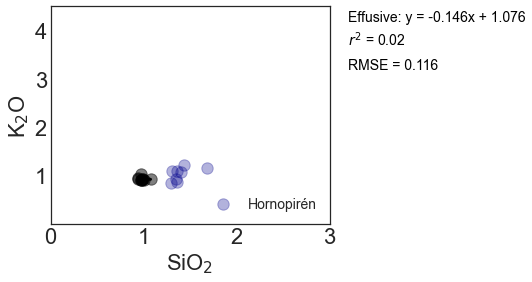

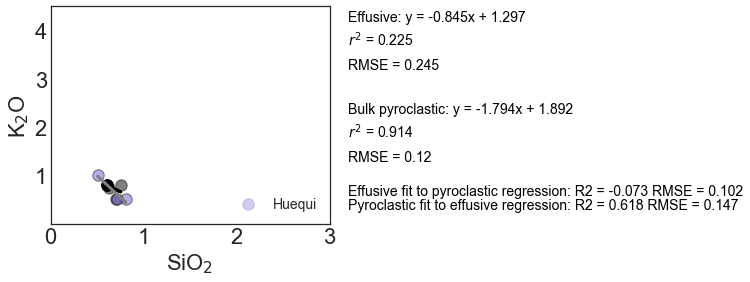

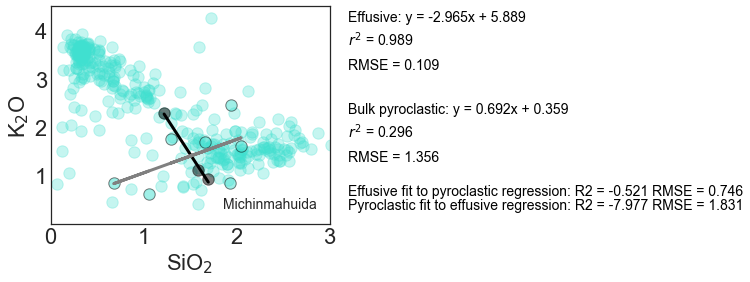

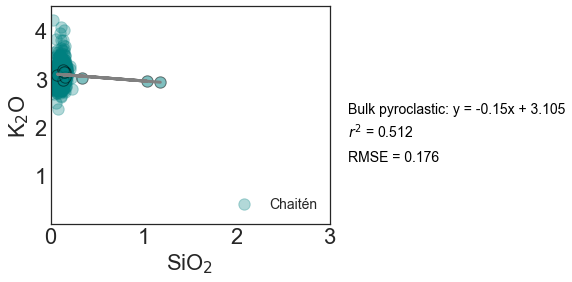

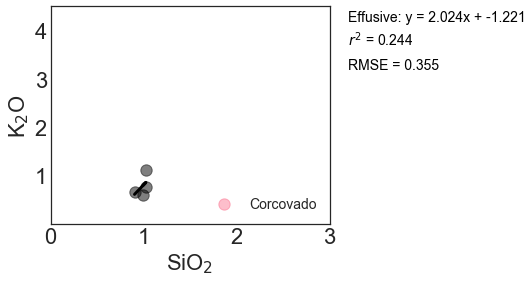

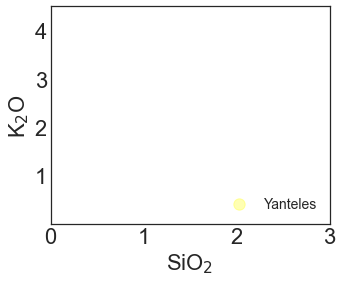

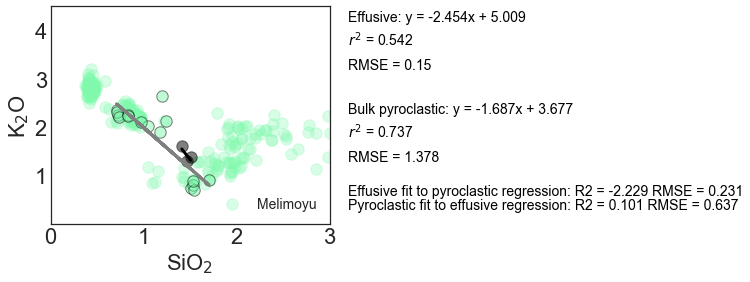

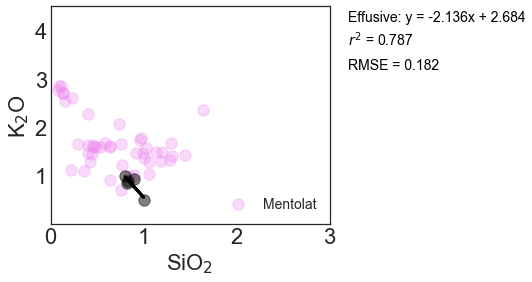

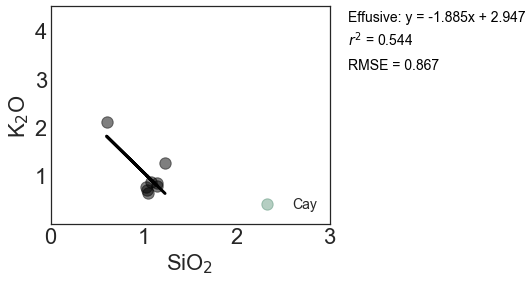

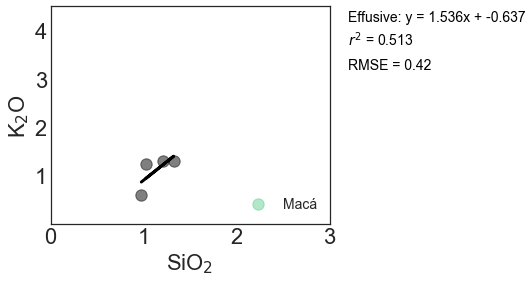

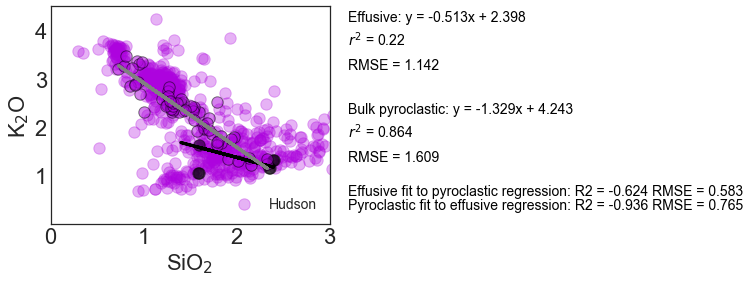

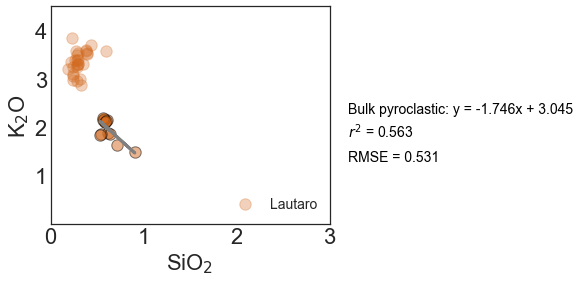

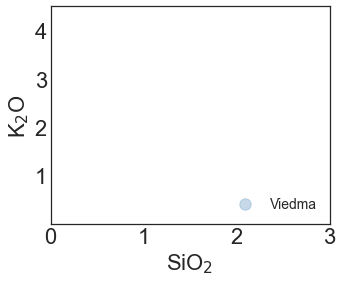

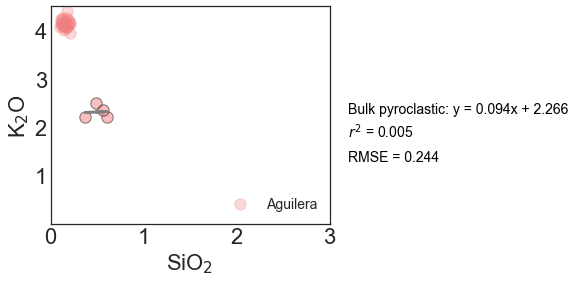

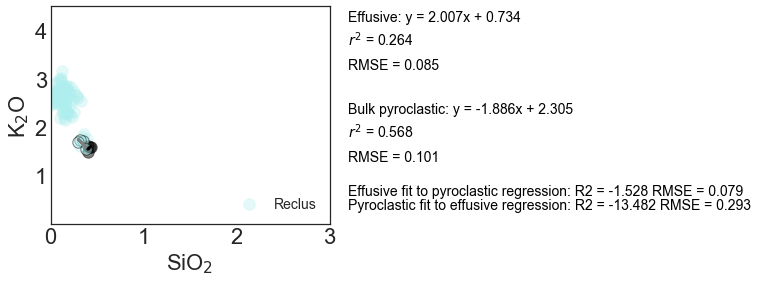

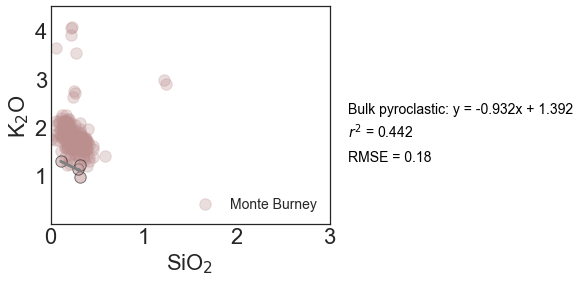

In [19]:
Data = Data.dropna(subset=['TiO2','K2O'],axis=0,how='all')
Data_glass = Data[(Data.TypeOfRegister=='Pyroclastic material')&(Data.TypeOfAnalysis=='Micro Analytical')]
Data_bulk = Data[(Data.TypeOfRegister=='Pyroclastic material')&(Data.TypeOfAnalysis=='Bulk')]
Data_effusive = Data[(Data.TypeOfRegister=='Effusive material')]

volcanoes_by_latitude = ['Llaima','Sollipulli','Caburga-Huelemolle','Villarrica','Quetrupillán','Lanín',
              'Huanquihue Group','Mocho-Choshuenco','Carrán-Los Venados','Puyehue-Cordón Caulle','Antillanca-Casablanca',
              'Osorno','Calbuco','Yate','Apagado','Hornopirén','Huequi','Michinmahuida','Chaitén','Corcovado',
              'Yanteles','Melimoyu','Mentolat','Cay','Macá','Hudson',
              'Lautaro','Viedma','Aguilera','Reclus','Monte Burney']

fit_info = pd.DataFrame()
fit_info['Volcano'] = volcanoes_by_latitude

# R2 and RMSE are measures of the fit of the data to the regression
fit_info['R2_effusive_regression'] = np.nan;fit_info['RMSE_effusive_regression'] = np.nan
fit_info['R2_bulk_pyroclastic_regression'] = np.nan;fit_info['RMSE_bulk_pyroclastic_regression'] = np.nan

# In order to check if 'bulk pyroclastic' data fits the 'effusive' products regression, I calculated R2 and RMSE of
#    the 'bulk pyroclastic' products to the 'effusive' linear regression and viceversa
fit_info['R2_effusive_to_bulk_piroclastic_regression'] = np.nan;fit_info['RMSE_effusive_to_bulk_piroclastic_regression'] = np.nan
fit_info['R2_bulk_pyroclastic_to_effusive_regression'] = np.nan;fit_info['RMSE_bulk_pyroclastic_to_effusive_regression'] = np.nan

for volcan in volcanoes_by_latitude:
    #print(volcan)
    plt.figure(figsize=(5,4))
    ax = plt.axes()
    Color, Marker  = simbologia(volcan,'Unknown')
    index = fit_info.index[fit_info.Volcano == volcan].tolist()[0]
    plt.scatter(Data_glass[Data_glass.Volcano == volcan].TiO2,Data_glass[Data_glass.Volcano == volcan].K2O,color=Color,edgecolors =Color,s=130,alpha=0.3,label=volcan)
        
    #----------- 'effusive' products 
    if len(Data_effusive[Data_effusive.Volcano == volcan].SiO2)>2:
        z, se, rank, singular_values, rcond = np.polyfit(Data_effusive[Data_effusive.Volcano == volcan].TiO2,Data_effusive[Data_effusive.Volcano == volcan].K2O,1,full=True)
        p = np.poly1d(z)
        r2 = r2_score(Data_effusive[Data_effusive.Volcano == volcan].K2O, p(Data_effusive[Data_effusive.Volcano == volcan].TiO2))
                
        #---------------- plot 'effusive' data and regression
        plt.scatter(Data_effusive[Data_effusive.Volcano == volcan].TiO2,Data_effusive[Data_effusive.Volcano == volcan].K2O,color='black',edgecolors ='black',s=130,alpha=0.5)
        plt.plot(Data_effusive[Data_effusive.Volcano == volcan].TiO2,p(Data_effusive[Data_effusive.Volcano == volcan].TiO2),color='black',linewidth=3)
        #print ("y=%.6fx+(%.6f)"%(z[0],z[1])) 
        ax.text(3.2,4.2,"Effusive: y = {}x + {}".format(np.around(z[0],3),np.around(z[1],3)),rotation=0,color='black',fontsize=14)
        ax.text(3.2,3.7,"$r^{2}$ = "+str(np.around(r2,3)),rotation=0,color='black',fontsize=14)
        ax.text(3.2,3.2,"RMSE = "+str(np.around(np.sqrt(se[0]),3)),rotation=0,color='black',fontsize=14)    
     
        #---------------- save 'effusive' regression's R2 and RMSE
        fit_info.loc[index,'R2_effusive_regression'] = r2
        fit_info.loc[index,'RMSE_effusive_regression'] = np.sqrt(se[0])
     
    #----------- 'bulk pyroclastic' products    
    if len(Data_bulk[Data_bulk.Volcano == volcan].SiO2)>2:
        z_bulk, se_bulk, rank_bulk, singular_values_bulk, rcond_bulk  = np.polyfit(Data_bulk[Data_bulk.Volcano == volcan].TiO2,Data_bulk[Data_bulk.Volcano == volcan].K2O,1,full=True)
        p_bulk = np.poly1d(z_bulk)
        r2_bulk = r2_score(Data_bulk[Data_bulk.Volcano == volcan].K2O, p_bulk(Data_bulk[Data_bulk.Volcano == volcan].TiO2))

        #---------------- plot 'bulk pyroclastic' data and regression
        plt.scatter(Data_bulk[Data_bulk.Volcano == volcan].TiO2,Data_bulk[Data_bulk.Volcano == volcan].K2O,color=Color,edgecolors ='black',s=130,alpha=0.5)
        plt.plot(Data_bulk[Data_bulk.Volcano == volcan].TiO2,p_bulk(Data_bulk[Data_bulk.Volcano == volcan].TiO2),color='grey',linewidth=3)
        #print ("y=%.6fx+(%.6f)"%(z[0],z[1])) 
        ax.text(3.2,2.3,"Bulk pyroclastic: y = {}x + {}".format(np.around(z_bulk[0],3),np.around(z_bulk[1],3)),rotation=0,color='black',fontsize=14)
        ax.text(3.2,1.8,"$r^{2}$ = "+str(np.around(r2_bulk,3)),rotation=0,color='black',fontsize=14)
        ax.text(3.2,1.3,"RMSE = "+str(np.around(np.sqrt(se_bulk[0]),3)),rotation=0,color='black',fontsize=14)

        #---------------- save 'bulk pyroclastic' regression's R2 and RMSE
        fit_info.loc[index,'R2_bulk_pyroclastic_regression'] = r2_bulk
        fit_info.loc[index,'RMSE_bulk_pyroclastic_regression'] = np.sqrt(se_bulk[0])
        
    if (len(Data_bulk[Data_bulk.Volcano == volcan].TiO2)>2) & (len(Data_effusive[Data_effusive.Volcano == volcan].TiO2)>2):
        #--------------------------- 'bulk pyroclastic' data fit to 'effusive' regression
        r2 = r2_score(Data_bulk[Data_bulk.Volcano == volcan].K2O, p(Data_bulk[Data_bulk.Volcano == volcan].TiO2))
        rmse = np.sqrt(mean_squared_error(Data_bulk[Data_bulk.Volcano == volcan].K2O, p(Data_bulk[Data_bulk.Volcano == volcan].TiO2)))
        ax.text(3.2,.3,"Pyroclastic fit to effusive regression: R2 = "+str(np.around(r2,3))+" RMSE = "+str(np.around(rmse,3)),rotation=0,color='black',fontsize=14)
        fit_info.loc[index,'R2_effusive_to_bulk_piroclastic_regression'] = r2
        fit_info.loc[index,'RMSE_effusive_to_bulk_piroclastic_regression'] = rmse
        
        #--------------------------- 'effusive' data fit to 'bulk pyroclastic' regression 
        r2 = r2_score(Data_effusive[Data_effusive.Volcano == volcan].K2O, p_bulk(Data_effusive[Data_effusive.Volcano == volcan].TiO2))
        rmse = np.sqrt(mean_squared_error(Data_effusive[Data_effusive.Volcano == volcan].K2O, p_bulk(Data_effusive[Data_effusive.Volcano == volcan].TiO2)))
        ax.text(3.2,.6,"Effusive fit to pyroclastic regression: R2 = "+str(np.around(r2,3))+" RMSE = "+str(np.around(rmse,3)),rotation=0,color='black',fontsize=14)
        fit_info.loc[index,'R2_bulk_pyroclastic_to_effusive_regression'] = r2
        fit_info.loc[index,'RMSE_bulk_pyroclastic_to_effusive_regression'] = rmse       
            
    
    leg=plt.legend(fancybox=True,ncol=1,loc='lower right',fontsize=14)
    ax.set_xticks([0,1,2,3])
    ax.set_yticks([1,2,3,4])    
    plt.xlabel(r"TiO$_{\rm 2}$", fontsize = 22)
    plt.ylabel(r"K$_{\rm 2}$O", fontsize = 22)
    ax.tick_params(labelsize = 22,direction='in',axis='both')#,visible = True
    plt.xlim(0,3)
    plt.ylim(0,4.5)
    plt.savefig('../Plots/'+volcan+'_trend.pdf',dpi = 300,bbox_inches='tight',bbox_to_anchor=(1,1))

In [20]:
fit_info

Volcano  R2_effusive_regression  RMSE_effusive_regression  \
0                  Llaima                0.188190                  0.941554   
1              Sollipulli                     NaN                       NaN   
2      Caburga-Huelemolle                0.494976                  0.725676   
3              Villarrica                0.659097                  0.296400   
4            Quetrupillán                0.189829                  3.348442   
5                   Lanín                0.192743                  3.452658   
6        Huanquihue Group                     NaN                       NaN   
7        Mocho-Choshuenco                     NaN                       NaN   
8      Carrán-Los Venados                     NaN                       NaN   
9   Puyehue-Cordón Caulle                0.395469                  4.912214   
10  Antillanca-Casablanca                     NaN                       NaN   
11                 Osorno                0.000007                  1.887570   
12                Calbuco                0.202502                  0.754017   
13                   Yate                0.969308                  0.498341   
14                Apagado                     NaN                       NaN   
15             Hornopirén                0.019977                  0.115790   
16                 Huequi                0.224855                  0.245114   
17          Michinmahuida                0.989258                  0.108632   
18                Chaitén                     NaN                       NaN   
19              Corcovado                0.244495                  0.355051   
20               Yanteles                     NaN                       NaN   
21               Melimoyu                0.542055                  0.150372   
22               Mentolat                0.786547                  0.181504   
23                    Cay                0.543773                  0.867210   
24                   Macá                0.513381                  0.419602   
25                 Hudson                0.220161                  1.141845   
26                Lautaro                     NaN                       NaN   
27                 Viedma                     NaN                       NaN   
28               Aguilera                     NaN                       NaN   
29                 Reclus                0.264201                  0.085035   
30           Monte Burney                     NaN                       NaN   

    R2_bulk_pyroclastic_regression  RMSE_bulk_pyroclastic_regression  \
0                         0.392951                          2.949727   
1                         0.987596                          0.295366   
2                         0.792257                          0.061534   
3                         0.310833                          0.756063   
4                         0.540441                          1.739602   
5                         0.707985                          0.108623   
6                              NaN                               NaN   
7                         0.450124                          3.344599   
8                              NaN                               NaN   
9                         0.325414                          2.090732   
10                        0.688709                          1.377028   
11                             NaN                               NaN   
12                        0.016387                          0.446802   
13                        0.788306                          0.580702   
14                        0.978213                          0.095119   
15                             NaN                               NaN   
16                        0.914371                          0.120482   
17                        0.296368                          1.356346   
18                        0.512380                          0.176359   
19                             NaN               

# Askip, K2O and TiO2 are not linearly correlated so the following steps make no sense

### 2.- Filter volcanoes by fit of data to regressions
I considered a good fit of data to the regression when R2 > 0.56 and RMSE < 0.3. Each user might consider different thresholds. 

In [21]:
print('\033[1m'+ 'Case 1: Volcanoes where "effusive" data fit "bulk pyroclastic" regression, and viceversa' + '\033[0m')
Volcanoes_both_fit = fit_info[((fit_info.R2_bulk_pyroclastic_to_effusive_regression > 0.56)
                              & (fit_info.RMSE_bulk_pyroclastic_to_effusive_regression < 0.3))&
                             ((fit_info.R2_effusive_to_bulk_piroclastic_regression > 0.56)
                              & (fit_info.RMSE_effusive_to_bulk_piroclastic_regression < 0.3))].Volcano
print(Volcanoes_both_fit.tolist())
Data_volcanoes_both_fit = Data[Data.Volcano.isin(Volcanoes_both_fit.tolist())]
print(" ")

print('\033[1m'+ 'Case 2: Volcanoes where only "effusive" data fit "bulk pyroclastic" regression' + '\033[0m')
Volcanoes_effusive_fit_pyro = fit_info[((fit_info.R2_bulk_pyroclastic_to_effusive_regression < 0.56)
                              | (fit_info.RMSE_bulk_pyroclastic_to_effusive_regression > 0.3))&
                             ((fit_info.R2_effusive_to_bulk_piroclastic_regression > 0.56)
                              & (fit_info.RMSE_effusive_to_bulk_piroclastic_regression < 0.3))].Volcano
print(Volcanoes_effusive_fit_pyro.tolist())
Data_volcanoes_effusive_fit_pyro = Data[Data.Volcano.isin(Volcanoes_effusive_fit_pyro.tolist())]
print(" ")

print('\033[1m'+ 'Case 3: Volcanoes where only "bulk pyroclastic" data fit "effusive" regression' + '\033[0m')
Volcanoes_pyro_fit_effusive = fit_info[((fit_info.R2_bulk_pyroclastic_to_effusive_regression > 0.56)
                              & (fit_info.RMSE_bulk_pyroclastic_to_effusive_regression < 0.3))&
                             ((fit_info.R2_effusive_to_bulk_piroclastic_regression < 0.56)
                              | (fit_info.RMSE_effusive_to_bulk_piroclastic_regression > 0.3))].Volcano
print(Volcanoes_pyro_fit_effusive.tolist())
Data_volcanoes_pyro_fit_effusive = Data[Data.Volcano.isin(Volcanoes_pyro_fit_effusive.tolist())]
print(" ")

print('\033[1m'+ 'Volcanoes where neither "effusive" data fit "bulk pyroclastic" regression, nor viceversa' + '\033[0m')
Volcanoes_neither_fit = fit_info[((fit_info.R2_bulk_pyroclastic_to_effusive_regression < 0.56)
                              | (fit_info.RMSE_bulk_pyroclastic_to_effusive_regression > 0.3))&
                             ((fit_info.R2_effusive_to_bulk_piroclastic_regression < 0.56)
                              | (fit_info.RMSE_effusive_to_bulk_piroclastic_regression > 0.3))
                              & ((fit_info.R2_bulk_pyroclastic_regression != -1))
                              & (fit_info.R2_effusive_regression != -1)].Volcano
print(Volcanoes_neither_fit.tolist())
print(" ")


print('\033[1m'+ 'Volcanoes with only "effusive" data or "bulk pyroclastic" data' + '\033[0m')
fit_info = fit_info.replace(np.nan,-1)

print('\033[1m'+ 'Case 4: Volcanoes where "effusive" data fit well the regression' + '\033[0m')
Volcanoes_good_effusive_fit = fit_info[((fit_info.R2_effusive_regression > 0.56) & (fit_info.RMSE_effusive_regression < 0.3))
                                   & ((fit_info.R2_bulk_pyroclastic_regression == -1))].Volcano
print(Volcanoes_good_effusive_fit.tolist())
Data_volcanoes_good_effusive_fit = Data[Data.Volcano.isin(Volcanoes_good_effusive_fit.tolist())]
print(" ")

print('\033[1m'+ 'Case 5: Volcanoes where "bulk pyroclastic" data fit well the regression' + '\033[0m')
Volcanoes_good_bulk_pyro_fit = fit_info[(fit_info.R2_effusive_regression == -1)
                                   & ((fit_info.R2_bulk_pyroclastic_regression > 0.56)&(fit_info.RMSE_bulk_pyroclastic_regression < 0.3))].Volcano
print(Volcanoes_good_bulk_pyro_fit.tolist())
Data_volcanoes_good_bulk_pyro_fit = Data[Data.Volcano.isin(Volcanoes_good_bulk_pyro_fit.tolist())]
print(" ")

print('\033[1m'+ 'Volcanoes whith not enough data for the regressions' + '\033[0m')
Volcanoes_no_fit = fit_info[(fit_info.R2_effusive_regression == -1)
                                              & (fit_info.R2_bulk_pyroclastic_regression == -1)].Volcano
print(Volcanoes_no_fit.tolist())
print(" ")


print('\033[1m'+ 'Volcanoes where neither "effusive" nor "bulk pyroclastic" products fit well their respective regressions' + '\033[0m')
Volcanoes_bad_effusive_bulk_pyro_fit = fit_info[((fit_info.R2_effusive_regression == -1)
                                   & ((fit_info.R2_bulk_pyroclastic_regression < 0.56)|(fit_info.RMSE_bulk_pyroclastic_regression > 0.3)))
                                |((fit_info.R2_effusive_regression < 0.56) & (fit_info.RMSE_effusive_regression > 0.3))
                                   & ((fit_info.R2_bulk_pyroclastic_regression == -1)) ].Volcano
print([item for item in Volcanoes_bad_effusive_bulk_pyro_fit.tolist() if item not in (Volcanoes_no_fit.tolist())])
print(" ")


Case 1: Volcanoes where "effusive" data fit "bulk pyroclastic" regression, and viceversa
[]
 
Case 2: Volcanoes where only "effusive" data fit "bulk pyroclastic" regression
['Huequi']
 
Case 3: Volcanoes where only "bulk pyroclastic" data fit "effusive" regression
['Yate']
 
Volcanoes where neither "effusive" data fit "bulk pyroclastic" regression, nor viceversa
['Llaima', 'Caburga-Huelemolle', 'Villarrica', 'Quetrupillán', 'Lanín', 'Puyehue-Cordón Caulle', 'Calbuco', 'Michinmahuida', 'Melimoyu', 'Hudson', 'Reclus']
 
Volcanoes with only "effusive" data or "bulk pyroclastic" data
Case 4: Volcanoes where "effusive" data fit well the regression
['Mentolat']
 
Case 5: Volcanoes where "bulk pyroclastic" data fit well the regression
['Sollipulli', 'Apagado']
 
Volcanoes whith not enough data for the regressions
['Huanquihue Group', 'Carrán-Los Venados', 'Yanteles', 'Viedma']
 
Volcanoes where neither "effusive" nor "bulk pyroclastic" products fit well their respective regressions
['Mocho-Ch

## 3.- For case 1, 2 and 3: Re calculate regression with both type of products and mesure the distance of each  'micro analytical pyroclastic' (aka glass)  sample to that regression.

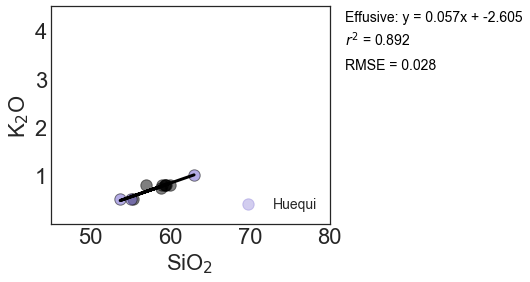

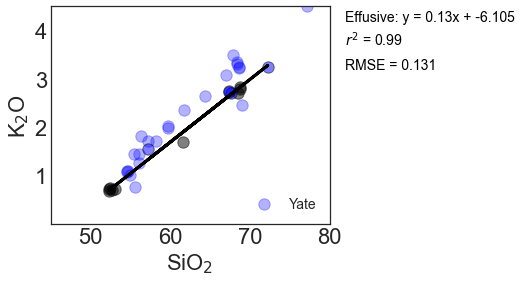

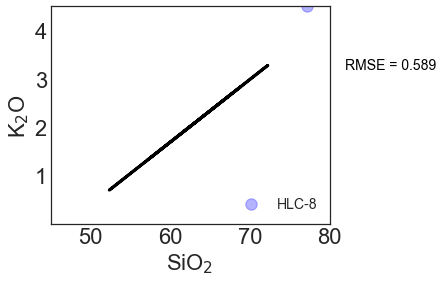

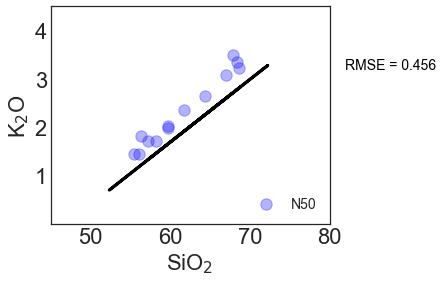

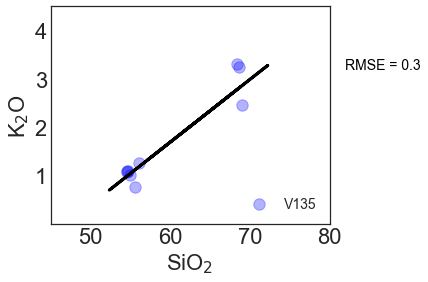

In [22]:
sample_distance_to_fit = pd.DataFrame()
sample_distance_to_fit['Volcano'] = np.nan
sample_distance_to_fit['SampleID'] = Data_glass.SampleID.unique()

#RMSE is what measures the distance of the sample to the regression
sample_distance_to_fit['sample_RMSE_to_regression'] = np.nan

for volcan in Volcanoes_both_fit.tolist()+Volcanoes_effusive_fit_pyro.tolist()+Volcanoes_pyro_fit_effusive.tolist():
    #print(volcan)
    plt.figure(figsize=(5,4));ax = plt.axes()
    Color, Marker  = simbologia(volcan,'Unknown')
    plt.scatter(Data_glass[Data_glass.Volcano == volcan].SiO2,Data_glass[Data_glass.Volcano == volcan].K2O,color=Color,edgecolors =Color,s=130,alpha=0.3,label=volcan)
    
    #---------------- plot 'effusive' and 'bulk pyroclastic' data and regression
    Data_regression = Data[((Data.TypeOfRegister=='Pyroclastic material')&(Data.TypeOfAnalysis=='Bulk'))|(Data.TypeOfRegister=='Effusive material')]
    z, rmse, rank, singular_values, rcond = np.polyfit(Data_regression[Data_regression.Volcano == volcan].SiO2,Data_regression[Data_regression.Volcano == volcan].K2O,1,full=True)
    p = np.poly1d(z)
    r2 = r2_score(Data_regression[Data_regression.Volcano == volcan].K2O, p(Data_regression[Data_regression.Volcano == volcan].SiO2))
    plt.scatter(Data_effusive[Data_effusive.Volcano == volcan].SiO2,Data_effusive[Data_effusive.Volcano == volcan].K2O,color='black',edgecolors ='black',s=130,alpha=0.5)
    plt.scatter(Data_bulk[Data_bulk.Volcano == volcan].SiO2,Data_bulk[Data_bulk.Volcano == volcan].K2O,color=Color,edgecolors ='black',s=130,alpha=0.5)
    plt.plot(Data_regression[Data_regression.Volcano == volcan].SiO2,p(Data_regression[Data_regression.Volcano == volcan].SiO2),color='black',linewidth=3)
        
    ax.text(82,4.2,"Effusive: y = {}x + {}".format(np.around(z[0],3),np.around(z[1],3)),rotation=0,color='black',fontsize=14)
    ax.text(82,3.7,"$r^{2}$ = "+str(np.around(r2,3)),rotation=0,color='black',fontsize=14)
    ax.text(82,3.2,"RMSE = "+str(np.around(rmse[0],3)),rotation=0,color='black',fontsize=14)    

    leg=plt.legend(fancybox=True,ncol=1,loc='lower right',fontsize=14)
    ax.set_xticks([50,60,70,80])
    ax.set_yticks([1,2,3,4])    
    plt.xlabel(r"TiO$_{\rm 2}$", fontsize = 22);plt.ylabel(r"K$_{\rm 2}$O", fontsize = 22)
    ax.tick_params(labelsize = 22,direction='in',axis='both')#,visible = True
    plt.xlim(45,80);plt.ylim(0,4.5)
   
    temp = Data_glass[(Data_glass.Volcano==volcan)]
        
    for sample in temp.SampleID.unique():
        #print(sample)
        plt.figure(figsize=(5,4));ax = plt.axes()
        temp2 = temp[temp.SampleID==sample]
        plt.scatter(temp2.SiO2,temp2.K2O,color=Color,edgecolors =Color,s=130,alpha=0.3,label=sample)
        plt.plot(Data_regression[Data_regression.Volcano == volcan].SiO2,p(Data_regression[Data_regression.Volcano == volcan].SiO2),color='black',linewidth=3)
   
        # calculate distance (RMSE) of sample to the regression
        rmse = np.sqrt(mean_squared_error(temp2.K2O, p(temp2.SiO2)))
        ax.text(82,3.2,"RMSE = "+str(np.around(rmse,3)),rotation=0,color='black',fontsize=14)    
        index =  sample_distance_to_fit.index[sample_distance_to_fit.SampleID == sample].tolist()[0]   
        
        # save distance (RMSE) of sample
        sample_distance_to_fit.loc[index,'sample_RMSE_to_regression'] = rmse  
        sample_distance_to_fit.loc[index,'Volcano'] = volcan
        
        leg=plt.legend(fancybox=True,ncol=1,loc='lower right',fontsize=14)
        ax.set_xticks([50,60,70,80]);ax.set_yticks([1,2,3,4])    
        plt.xlabel(r"TiO$_{\rm 2}$", fontsize = 22);plt.ylabel(r"K$_{\rm 2}$O", fontsize = 22)
        ax.tick_params(labelsize = 22,direction='in',axis='both')#,visible = True
        plt.xlim(45,80);plt.ylim(0,4.5)
           

### 4.- For case 4 and 5 Mesure the distance of each 'micro analytical pyroclastic' (aka glass) sample to the respective 'effusive' or 'bulk pyroclastic' regression.

C:\Users\consue\AppData\Local\Temp\ipykernel_20620\3241805654.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,4));ax = plt.axes()


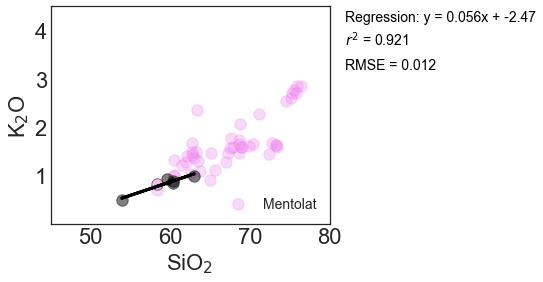

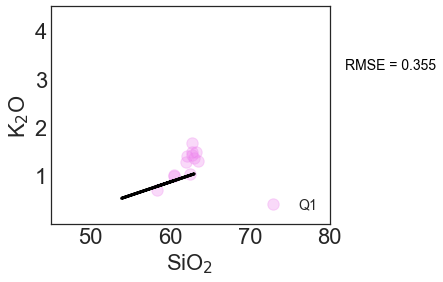

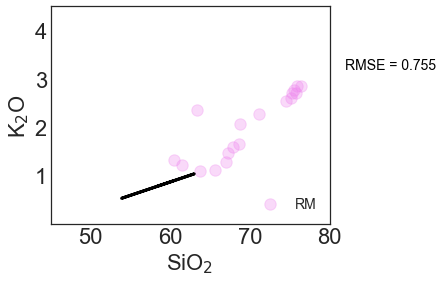

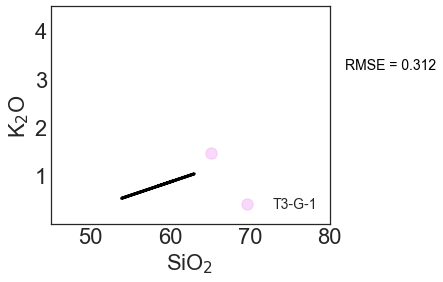

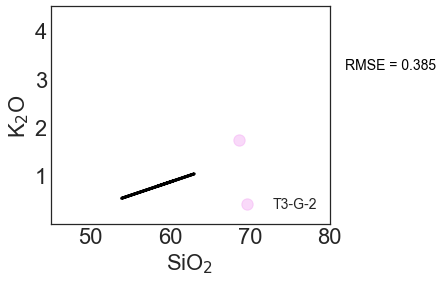

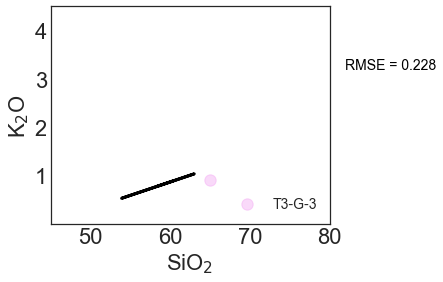

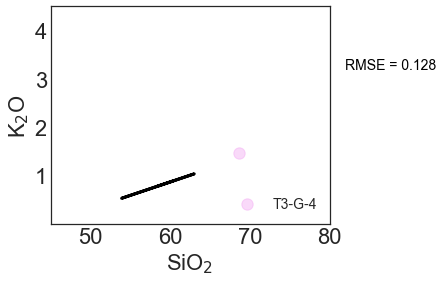

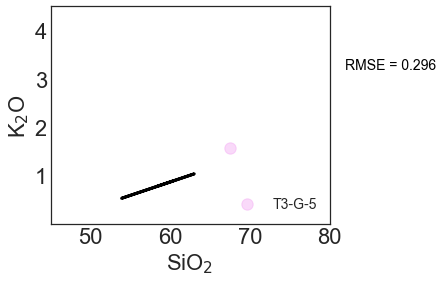

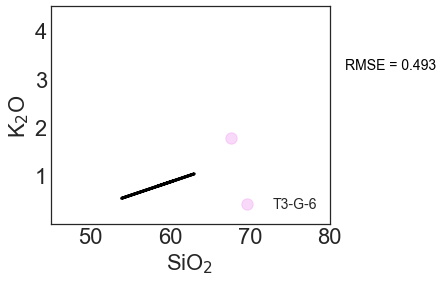

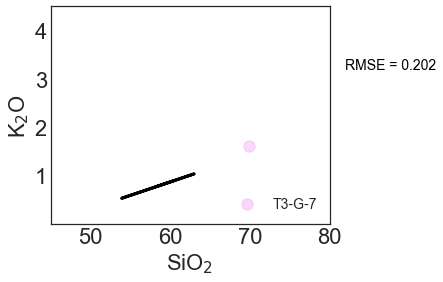

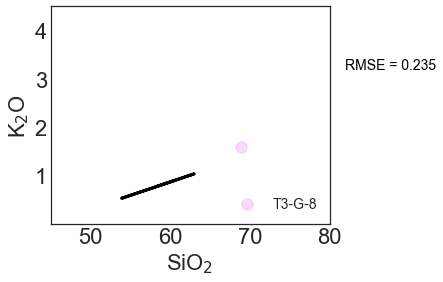

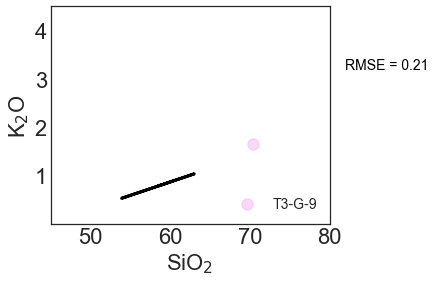

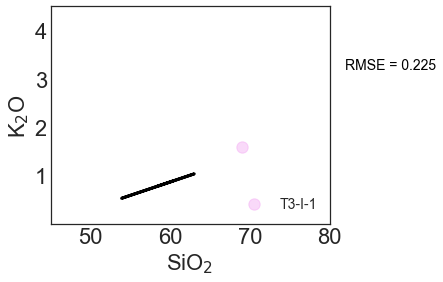

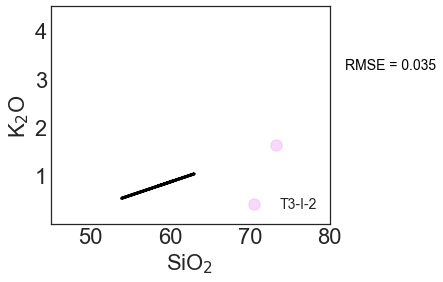

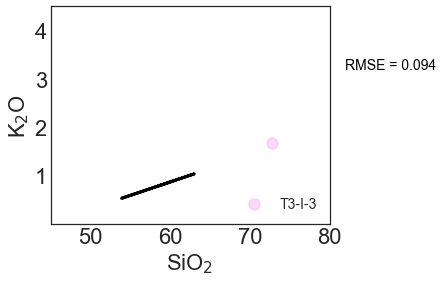

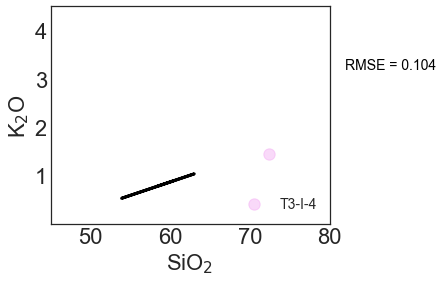

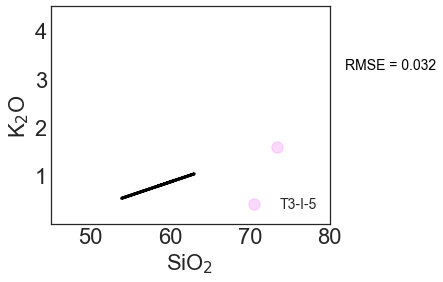

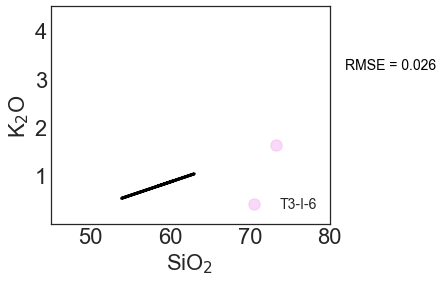

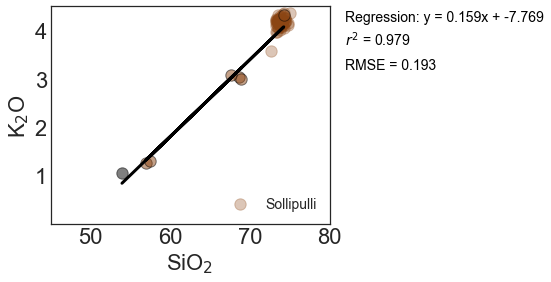

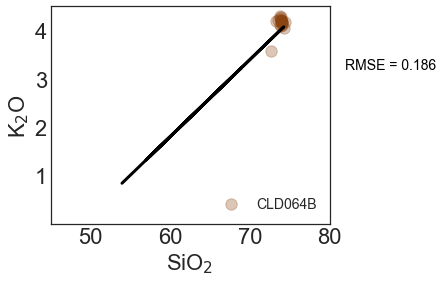

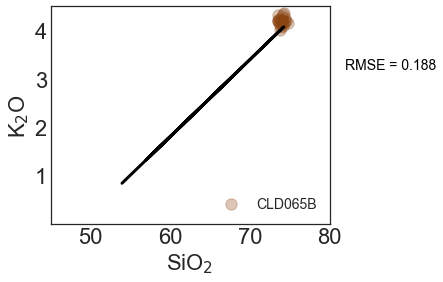

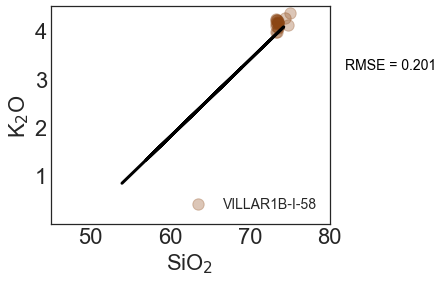

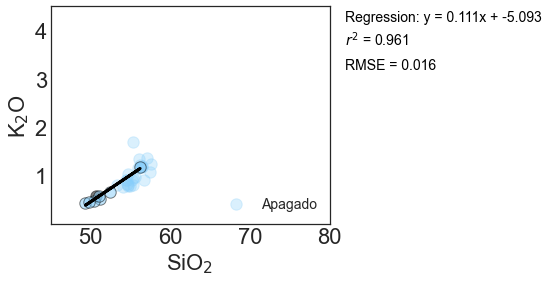

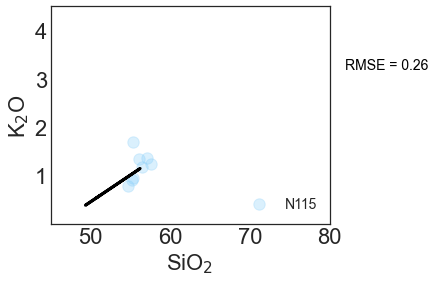

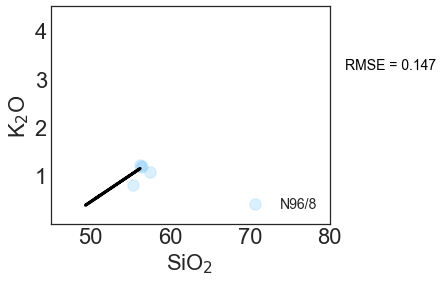

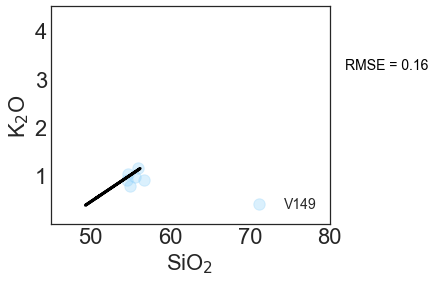

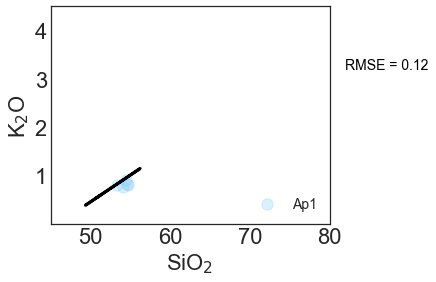

In [23]:
for volcan in Volcanoes_good_effusive_fit.tolist()+Volcanoes_good_bulk_pyro_fit.tolist():
    #print(volcan)
    plt.figure(figsize=(5,4));ax = plt.axes()
    Color, Marker  = simbologia(volcan,'Unknown')
    plt.scatter(Data_glass[Data_glass.Volcano == volcan].SiO2,Data_glass[Data_glass.Volcano == volcan].K2O,color=Color,edgecolors =Color,s=130,alpha=0.3,label=volcan)
    
    #---------------- plot all 'effusive' or 'bulk pyroclastic' data and regression
    Data_regression = Data[((Data.TypeOfRegister=='Pyroclastic material')&(Data.TypeOfAnalysis=='Bulk'))|(Data.TypeOfRegister=='Effusive material')]
    z, rmse, rank, singular_values, rcond = np.polyfit(Data_regression[Data_regression.Volcano == volcan].SiO2,Data_regression[Data_regression.Volcano == volcan].K2O,1,full=True)
    p = np.poly1d(z)
    r2 = r2_score(Data_regression[Data_regression.Volcano == volcan].K2O, p(Data_regression[Data_regression.Volcano == volcan].SiO2))
    plt.scatter(Data_effusive[Data_effusive.Volcano == volcan].SiO2,Data_effusive[Data_effusive.Volcano == volcan].K2O,color='black',edgecolors ='black',s=130,alpha=0.5)
    plt.scatter(Data_bulk[Data_bulk.Volcano == volcan].SiO2,Data_bulk[Data_bulk.Volcano == volcan].K2O,color=Color,edgecolors ='black',s=130,alpha=0.5)
    plt.plot(Data_regression[Data_regression.Volcano == volcan].SiO2,p(Data_regression[Data_regression.Volcano == volcan].SiO2),color='black',linewidth=3)
        
    ax.text(82,4.2,"Regression: y = {}x + {}".format(np.around(z[0],3),np.around(z[1],3)),rotation=0,color='black',fontsize=14)
    ax.text(82,3.7,"$r^{2}$ = "+str(np.around(r2,3)),rotation=0,color='black',fontsize=14)
    ax.text(82,3.2,"RMSE = "+str(np.around(rmse[0],3)),rotation=0,color='black',fontsize=14)    

    leg=plt.legend(fancybox=True,ncol=1,loc='lower right',fontsize=14)
    ax.set_xticks([50,60,70,80])
    ax.set_yticks([1,2,3,4])    
    plt.xlabel(r"TiO$_{\rm 2}$", fontsize = 22);plt.ylabel(r"K$_{\rm 2}$O", fontsize = 22)
    ax.tick_params(labelsize = 22,direction='in',axis='both')#,visible = True
    plt.xlim(45,80);plt.ylim(0,4.5)
   
    temp = Data_glass[(Data_glass.Volcano==volcan)]
        
    for sample in temp.SampleID.unique():
        #print(sample)
        plt.figure(figsize=(5,4));ax = plt.axes()
        temp2 = temp[temp.SampleID==sample]
        
        #plot 'Sample'
        plt.scatter(temp2.SiO2,temp2.K2O,color=Color,edgecolors =Color,s=130,alpha=0.3,label=sample)
        plt.plot(Data_regression[Data_regression.Volcano == volcan].SiO2,p(Data_regression[Data_regression.Volcano == volcan].SiO2),color='black',linewidth=3)
   
        # calculate distance (RMSE) of sample to the regression
        rmse = np.sqrt(mean_squared_error(temp2.K2O, p(temp2.SiO2)))
        ax.text(82,3.2,"RMSE = "+str(np.around(rmse,3)),rotation=0,color='black',fontsize=14)    
        index =  sample_distance_to_fit.index[sample_distance_to_fit.SampleID == sample].tolist()[0]  
        
        # save distance (RMSE) of sample
        sample_distance_to_fit.loc[index,'sample_RMSE_to_regression'] = rmse  
        sample_distance_to_fit.loc[index,'Volcano'] = volcan
        
        leg=plt.legend(fancybox=True,ncol=1,loc='lower right',fontsize=14)
        ax.set_xticks([50,60,70,80]);ax.set_yticks([1,2,3,4])    
        plt.xlabel(r"TiO$_{\rm 2}$", fontsize = 22);plt.ylabel(r"K$_{\rm 2}$O", fontsize = 22)
        ax.tick_params(labelsize = 22,direction='in',axis='both')#,visible = True
        plt.xlim(45,80);plt.ylim(0,4.5)
        

In [24]:
sample_distance_to_fit = sample_distance_to_fit.dropna(subset=['Volcano'])
fig = px.scatter(sample_distance_to_fit, sample_distance_to_fit.Volcano, sample_distance_to_fit.sample_RMSE_to_regression,
                 color = 'Volcano', hover_data = ['SampleID','sample_RMSE_to_regression'],width=800, height=500)
fig.show()

### 5.- For the 'Samples' with a distance higher-than-accepted from the respective regression, measure the distance to the regression of each 'SampleObservation'
In this case the threshold I used is with sample_RMSE_to_regression > 0.3. Each user might consider different thresholds. 

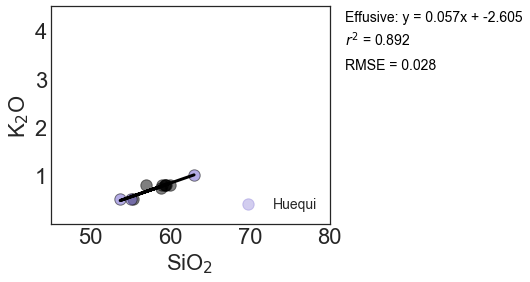

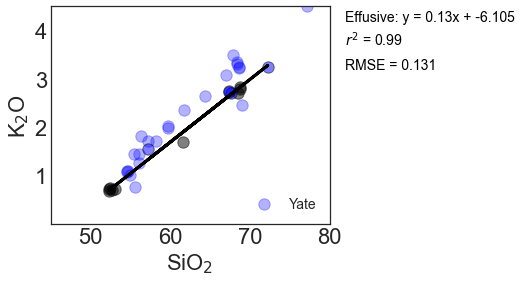

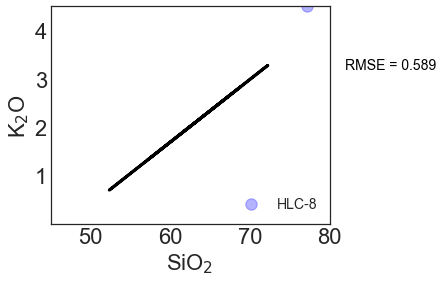

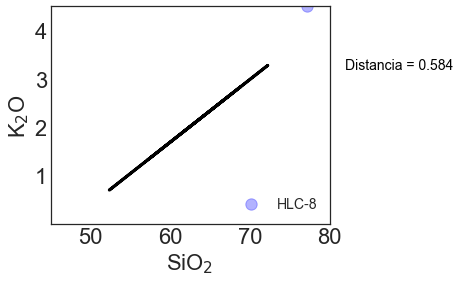

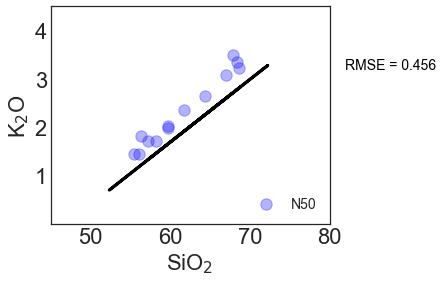

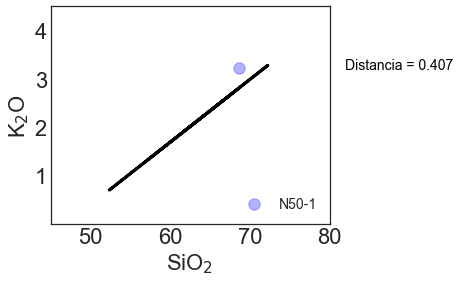

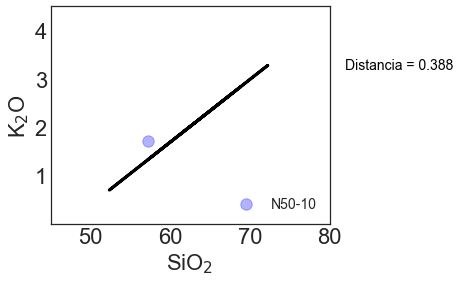

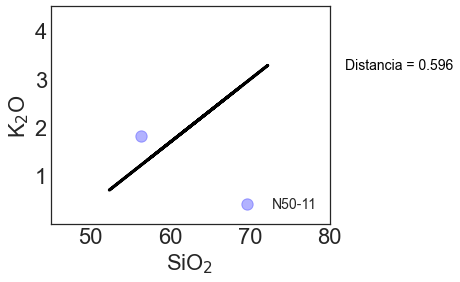

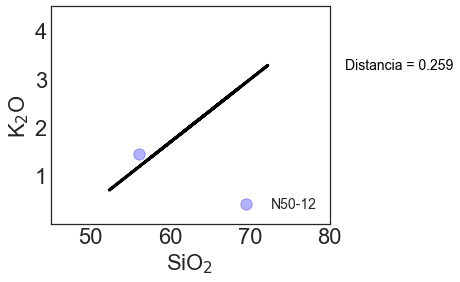

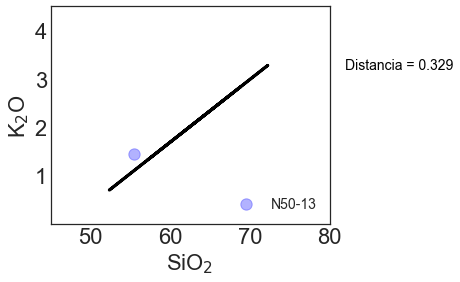

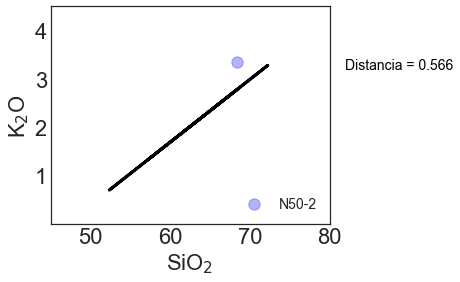

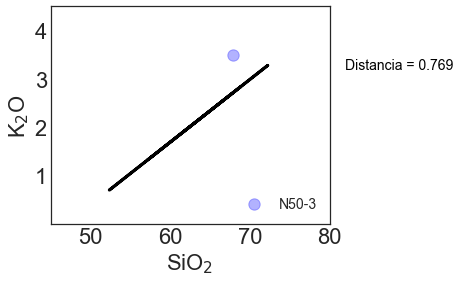

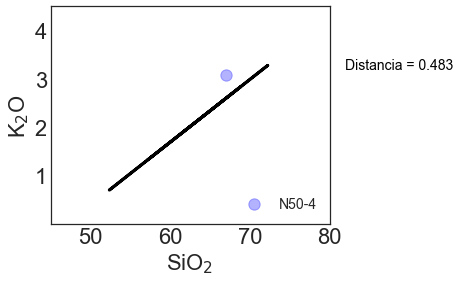

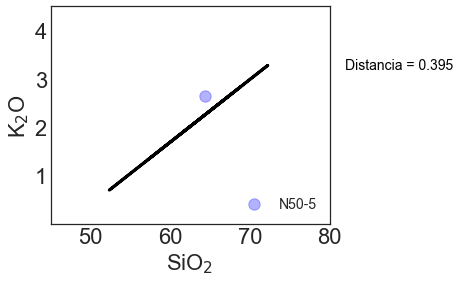

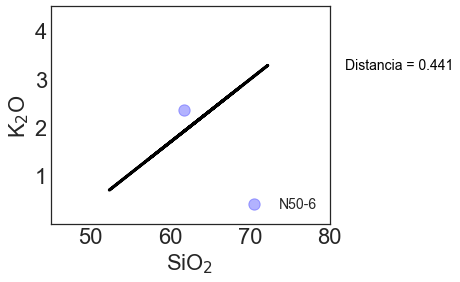

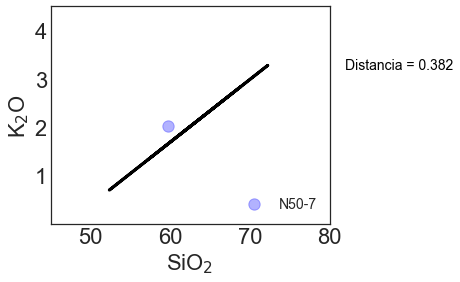

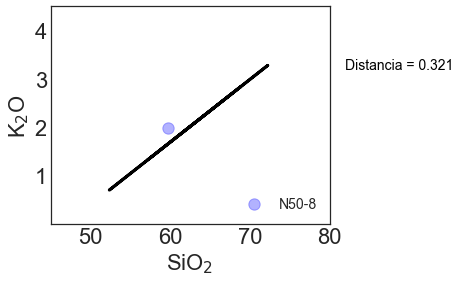

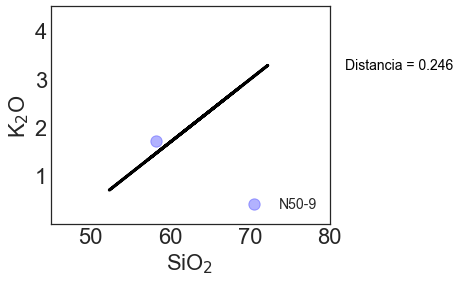

In [25]:
sampleObs_distance_to_fit = pd.DataFrame()
sampleObs_distance_to_fit['Volcano'] = np.nan
sampleObs_distance_to_fit['SampleObservationID'] = Data_glass.SampleObservationID.unique() 
sampleObs_distance_to_fit['SampleObservation_distance_to_regression'] = np.nan

for volcan in Volcanoes_both_fit.tolist()+Volcanoes_effusive_fit_pyro.tolist()+Volcanoes_pyro_fit_effusive.tolist():
    #print(volcan)
    plt.figure(figsize=(5,4));ax = plt.axes()
    Color, Marker  = simbologia(volcan,'Unknown')
    plt.scatter(Data_glass[Data_glass.Volcano == volcan].SiO2,Data_glass[Data_glass.Volcano == volcan].K2O,color=Color,edgecolors =Color,s=130,alpha=0.3,label=volcan)
    
    #---------------- plot all 'effusive' or 'bulk pyroclastic' data and regression
    z, rmse, rank, singular_values, rcond = np.polyfit(Data_regression[Data_regression.Volcano == volcan].SiO2,Data_regression[Data_regression.Volcano == volcan].K2O,1,full=True)
    p = np.poly1d(z)
    r2 = r2_score(Data_regression[Data_regression.Volcano == volcan].K2O, p(Data_regression[Data_regression.Volcano == volcan].SiO2))
    plt.scatter(Data_effusive[Data_effusive.Volcano == volcan].SiO2,Data_effusive[Data_effusive.Volcano == volcan].K2O,color='black',edgecolors ='black',s=130,alpha=0.5)
    plt.scatter(Data_bulk[Data_bulk.Volcano == volcan].SiO2,Data_bulk[Data_bulk.Volcano == volcan].K2O,color=Color,edgecolors ='black',s=130,alpha=0.5)
    plt.plot(Data_regression[Data_regression.Volcano == volcan].SiO2,p(Data_regression[Data_regression.Volcano == volcan].SiO2),color='black',linewidth=3)
        
    ax.text(82,4.2,"Effusive: y = {}x + {}".format(np.around(z[0],3),np.around(z[1],3)),rotation=0,color='black',fontsize=14)
    ax.text(82,3.7,"$r^{2}$ = "+str(np.around(r2,3)),rotation=0,color='black',fontsize=14)
    ax.text(82,3.2,"RMSE = "+str(np.around(rmse[0],3)),rotation=0,color='black',fontsize=14)    

    leg=plt.legend(fancybox=True,ncol=1,loc='lower right',fontsize=14)
    ax.set_xticks([50,60,70,80]);ax.set_yticks([1,2,3,4])    
    plt.xlabel(r"TiO$_{\rm 2}$", fontsize = 22);plt.ylabel(r"K$_{\rm 2}$O", fontsize = 22)
    ax.tick_params(labelsize = 22,direction='in',axis='both')#,visible = True
    plt.xlim(45,80);plt.ylim(0,4.5)
   
    temp = Data_glass[(Data_glass.Volcano==volcan)]
        
    for sample in temp.SampleID.unique():
         #filter samples with RMSE higher than 0.35 (arbitrary threshold, could change in the future, mainly to higher values)
        if sample_distance_to_fit[sample_distance_to_fit.SampleID == sample].sample_RMSE_to_regression.values[0]>0.35:
            
            #Plot the 'Sample'
            plt.figure(figsize=(5,4));ax = plt.axes()
            temp2 = temp[temp.SampleID==sample]
            plt.scatter(temp2.SiO2,temp2.K2O,color=Color,edgecolors =Color,s=130,alpha=0.3,label=sample)
            plt.plot(Data_regression[Data_regression.Volcano == volcan].SiO2,p(Data_regression[Data_regression.Volcano == volcan].SiO2),color='black',linewidth=3)
            rmse = np.sqrt(mean_squared_error(temp2.K2O, p(temp2.SiO2)))
            ax.text(82,3.2,"RMSE = "+str(np.around(rmse,3)),rotation=0,color='black',fontsize=14) 
        
            leg=plt.legend(fancybox=True,ncol=1,loc='lower right',fontsize=14)
            ax.set_xticks([50,60,70,80]);ax.set_yticks([1,2,3,4])    
            plt.xlabel(r"TiO$_{\rm 2}$", fontsize = 22);plt.ylabel(r"K$_{\rm 2}$O", fontsize = 22)
            ax.tick_params(labelsize = 22,direction='in',axis='both')#,visible = True
            plt.xlim(45,80);plt.ylim(0,4.5)
            
            for sampleObs in temp2.SampleObservationID.unique().tolist():
                #print(sampleObs)
                temp3 = temp2[temp2.SampleObservationID==sampleObs]
                a = -z[0]; c = -z[1]; b = 1
                shortestDistance = np.linalg.norm(a*temp3.SiO2+b*temp3.K2O+c)/np.sqrt(a*a+b*b)
                index =  sampleObs_distance_to_fit.index[sampleObs_distance_to_fit.SampleObservationID == sampleObs].tolist()[0]
                
                # save distance of 'SampleObservation' to the regression
                #    if curve is ax + bx + c = 0, then distance of a point to the curve is |aX0 + bx0 + c| / sqrt(a^2 + b^2)) 
                sampleObs_distance_to_fit.loc[index,'SampleObservation_distance_to_regression'] = shortestDistance
                sampleObs_distance_to_fit.loc[index,'Volcano'] = volcan
                
                #Plot the 'SampleObservation'
                plt.figure(figsize=(5,4));ax = plt.axes()
                plt.scatter(temp3.SiO2,temp3.K2O,color=Color,edgecolors =Color,s=130,alpha=0.3,label=sampleObs)
                plt.plot(Data_regression[Data_regression.Volcano == volcan].SiO2,p(Data_regression[Data_regression.Volcano == volcan].SiO2),color='black',linewidth=3)
                ax.text(82,3.2,"Distancia = "+str(np.around(shortestDistance,3)),rotation=0,color='black',fontsize=14) 
                
                leg=plt.legend(fancybox=True,ncol=1,loc='lower right',fontsize=14)
                ax.set_xticks([50,60,70,80]);ax.set_yticks([1,2,3,4])    
                plt.xlabel(r"TiO$_{\rm 2}$", fontsize = 22);plt.ylabel(r"K$_{\rm 2}$O", fontsize = 22)
                ax.tick_params(labelsize = 22,direction='in',axis='both')#,visible = True
                plt.xlim(45,80);plt.ylim(0,4.5)

In [26]:
sampleObs_distance_to_fit = sampleObs_distance_to_fit.dropna(subset=['Volcano'])
fig = px.scatter(sampleObs_distance_to_fit, sampleObs_distance_to_fit.Volcano, sampleObs_distance_to_fit.SampleObservation_distance_to_regression,
                 color = 'Volcano', hover_data = ['SampleObservationID','SampleObservation_distance_to_regression'],width=800, height=500)
fig.show()